# Final Project - Predicting Movie Success 



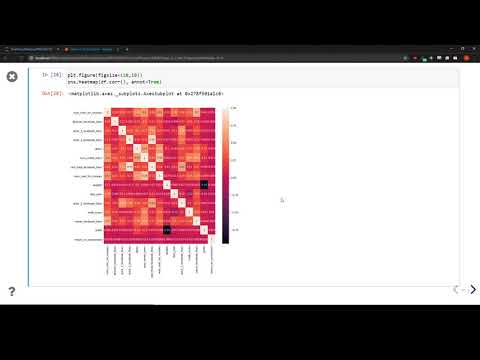

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('3R0YKVjrCOA')

## Business Understanding

The film industry produces thousands of movies every year and the success of the films greatly vary. I'd like to get an understanding of the reasons for why this is the case and more specifically I want to look at the data of past movies in order to predict which movies might perform better than others in the future. To do this I will use IMDb data. 
- If I was hired as a data/business analyst for predicting movie success, I would want to figure out what excites and motivates consumers to view a film and collect social media data that relates to the film(s).
- As a hypothesis I will say that gross earnings and facebook likes for the actors, directors and the movie will be highly correlated to imdb score.

## Data Understanding

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV
# from sklearn.externals.six import StringIO

# import pydotplus

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Have python read the excel file and name the dataset as 'df'
df= pd.read_excel("movie_metadata.xlsx") 
# Display the dataset to visualize the columns and rows we will be working with
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
# Gather basic statistics about columns
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [5]:
# More information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
# Find out amount of null values in the dataset
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
# Gather stats about the imdb_score column
df['imdb_score'].describe()

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

In [8]:
# Sorting Directors by their average imdb scores
df.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(15)

director_name
John Blanchard           9.500
Mitchell Altieri         8.700
Sadyk Sher-Niyaz         8.700
Cary Bell                8.700
Mike Mayhall             8.600
Charles Chaplin          8.600
Majid Majidi             8.500
Ron Fricke               8.500
Damien Chazelle          8.500
Raja Menon               8.500
Sergio Leone             8.475
Christopher Nolan        8.425
Richard Marquand         8.400
Marius A. Markevicius    8.400
S.S. Rajamouli           8.400
Name: imdb_score, dtype: float64

In [9]:
# Sorting actors by the average imdb scores of movies they were main actor in
df.groupby('actor_1_name')['imdb_score'].mean().sort_values(ascending=False).head(15)

actor_1_name
Krystyna Janda        9.1
Jack Warden           8.9
Rob McElhenney        8.8
Elina Abai Kyzy       8.7
Kimberley Crossman    8.7
Takashi Shimura       8.7
Jackie Gleason        8.7
Abigail Evans         8.7
Maria Pia Calzone     8.7
Paulette Goddard      8.6
David Raizor          8.6
Donna Reed            8.6
Claudia Cardinale     8.6
Bunta Sugawara        8.6
Ruth Wilson           8.6
Name: imdb_score, dtype: float64

## Data Preparation

In [10]:
# Viewing data types for every column
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [11]:
# Drop columns deemed unnecessary or unusable
df=df.drop(['color','duration','aspect_ratio','movie_imdb_link','content_rating', 'genres', 'plot_keywords','language'],axis=1)
df.head(10)

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,AvatarÂ,886204,4834,Wes Studi,0.0,3054.0,USA,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's EndÂ,471220,48350,Jack Davenport,0.0,1238.0,USA,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,SpectreÂ,275868,11700,Stephanie Sigman,1.0,994.0,UK,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight RisesÂ,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,USA,250000000.0,2012.0,23000.0,8.5,164000
4,Doug Walker,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force AwakensÂ ...,8,143,NaN,0.0,NaN,NaN,NaN,NaN,12.0,7.1,0
5,Andrew Stanton,462.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John CarterÂ,212204,1873,Polly Walker,1.0,738.0,USA,263700000.0,2012.0,632.0,6.6,24000
6,Sam Raimi,392.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3Â,383056,46055,Kirsten Dunst,0.0,1902.0,USA,258000000.0,2007.0,11000.0,6.2,0
7,Nathan Greno,324.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Brad Garrett,TangledÂ,294810,2036,M.C. Gainey,1.0,387.0,USA,260000000.0,2010.0,553.0,7.8,29000
8,Joss Whedon,635.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,Avengers: Age of UltronÂ,462669,92000,Scarlett Johansson,4.0,1117.0,USA,250000000.0,2015.0,21000.0,7.5,118000
9,David Yates,375.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Alan Rickman,Harry Potter and the Half-Blood PrinceÂ,321795,58753,Rupert Grint,3.0,973.0,UK,250000000.0,2009.0,11000.0,7.5,10000


In [12]:
# I noticed in the column movie_title there is an 'Â' at the end of every title and want it removed
df["movie_title"] = df["movie_title"].str.replace("Â","")
df.head()

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,USA,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,USA,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,UK,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,USA,250000000.0,2012.0,23000.0,8.5,164000
4,Doug Walker,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,NaN,NaN,NaN,12.0,7.1,0


In [13]:
# Add columns 'profit' and 'return_on_investment'
df['profit'] = df['gross'] - df['budget']
df['return_on_investment'] = (df['profit']/df['budget']*100)
df.head()

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,...,facenumber_in_poster,num_user_for_reviews,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,return_on_investment
0,James Cameron,723.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,...,0.0,3054.0,USA,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543
1,Gore Verbinski,302.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,...,0.0,1238.0,USA,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717
2,Sam Mendes,602.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,...,1.0,994.0,UK,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,-18.337071
3,Christopher Nolan,813.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,...,0.0,2701.0,USA,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,79.252257
4,Doug Walker,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,...,0.0,NaN,NaN,NaN,NaN,12.0,7.1,0,NaN,NaN


In [14]:
# Make sure newly added columns have the correct data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   director_facebook_likes    4939 non-null   float64
 3   actor_3_facebook_likes     5020 non-null   float64
 4   actor_2_name               5030 non-null   object 
 5   actor_1_facebook_likes     5036 non-null   float64
 6   gross                      4159 non-null   float64
 7   actor_1_name               5036 non-null   object 
 8   movie_title                5043 non-null   object 
 9   num_voted_users            5043 non-null   int64  
 10  cast_total_facebook_likes  5043 non-null   int64  
 11  actor_3_name               5020 non-null   object 
 12  facenumber_in_poster       5030 non-null   float64
 13  num_user_for_reviews       5022 non-null   float

In [15]:
# Drop null values to prepare dataset for analysis
df = df.dropna()
df.isnull().sum()

director_name                0
num_critic_for_reviews       0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
num_user_for_reviews         0
country                      0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
profit                       0
return_on_investment         0
dtype: int64

In [16]:
# Run count in order to see every row has every column filled, i.e. no null values
df.count()

director_name                3874
num_critic_for_reviews       3874
director_facebook_likes      3874
actor_3_facebook_likes       3874
actor_2_name                 3874
actor_1_facebook_likes       3874
gross                        3874
actor_1_name                 3874
movie_title                  3874
num_voted_users              3874
cast_total_facebook_likes    3874
actor_3_name                 3874
facenumber_in_poster         3874
num_user_for_reviews         3874
country                      3874
budget                       3874
title_year                   3874
actor_2_facebook_likes       3874
imdb_score                   3874
movie_facebook_likes         3874
profit                       3874
return_on_investment         3874
dtype: int64

## Business Intelligence

In this section I would like to delve deeper into the data and try to understand what makes a movie successful. I will mainly do this by creating graphs to visualize the data.

In [17]:
# Get the mean imdb score of all movies in the dataset
df['imdb_score'].mean()

6.462183789364979

In [18]:
# Sort top 10 movies by number of users ratings
df.groupby('movie_title')['num_voted_users'].max().sort_values(ascending=False).head(10)

movie_title
The Shawshank Redemption                              1689764
The Dark Knight                                       1676169
Inception                                             1468200
Fight Club                                            1347461
Pulp Fiction                                          1324680
Forrest Gump                                          1251222
The Lord of the Rings: The Fellowship of the Ring     1238746
The Matrix                                            1217752
The Lord of the Rings: The Return of the King         1215718
The Godfather                                         1155770
Name: num_voted_users, dtype: int64

In [19]:
# Sort movies by the number of critic reviews
df.groupby('movie_title')['num_critic_for_reviews'].max().sort_values(ascending=False).head(10)

movie_title
The Dark Knight Rises     813.0
Prometheus                775.0
Django Unchained          765.0
Skyfall                   750.0
Mad Max: Fury Road        739.0
Gravity                   738.0
Man of Steel              733.0
Avatar                    723.0
Interstellar              712.0
The Avengers              703.0
Name: num_critic_for_reviews, dtype: float64

In [20]:
# Sort movies by number of user reviews
df.groupby('movie_title')['num_user_for_reviews'].max().sort_values(ascending=False).head(10)

movie_title
The Lord of the Rings: The Fellowship of the Ring     5060.0
The Dark Knight                                       4667.0
The Shawshank Redemption                              4144.0
The Matrix                                            3646.0
Star Wars: Episode I - The Phantom Menace             3597.0
Star Wars: Episode II - Attack of the Clones          3516.0
The Blair Witch Project                               3400.0
Star Wars: Episode III - Revenge of the Sith          3286.0
The Lord of the Rings: The Return of the King         3189.0
Avatar                                                3054.0
Name: num_user_for_reviews, dtype: float64

In [21]:
# Sort movies by their imdb scores
df.groupby('movie_title')['imdb_score'].max().sort_values(ascending=False).head(10)

movie_title
The Shawshank Redemption                           9.3
The Godfather                                      9.2
The Godfather: Part II                             9.0
The Dark Knight                                    9.0
Pulp Fiction                                       8.9
The Good, the Bad and the Ugly                     8.9
Schindler's List                                   8.9
The Lord of the Rings: The Return of the King      8.9
Forrest Gump                                       8.8
Star Wars: Episode V - The Empire Strikes Back     8.8
Name: imdb_score, dtype: float64

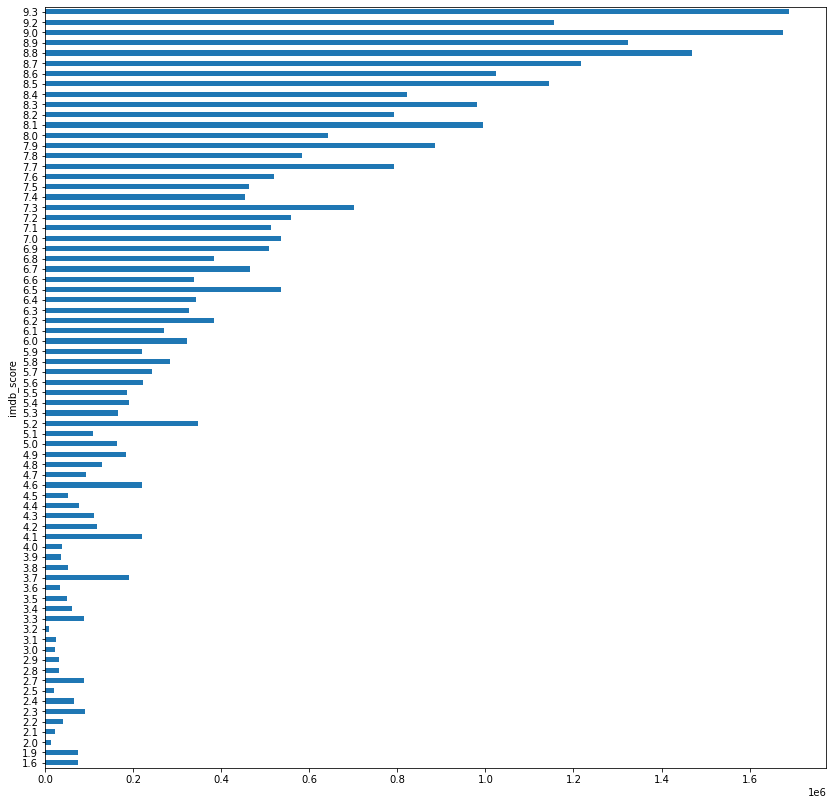

In [22]:
# Sort imdb scores by number of user votes visualized using a horizontal bar graph
df.groupby('imdb_score')['num_voted_users'].max().plot(kind='barh', figsize=(14,14));

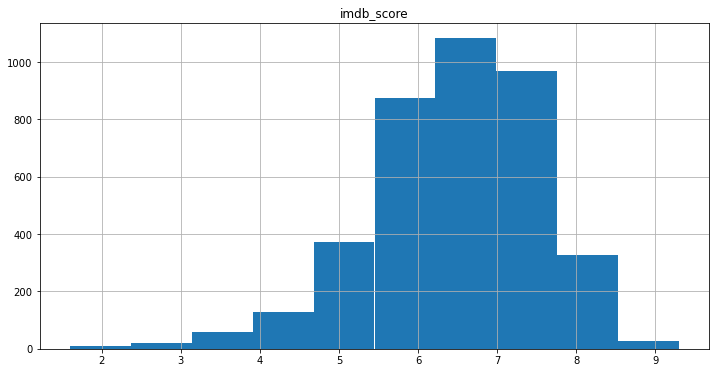

In [23]:
# Histogram of imdb scores
df.hist(column='imdb_score', figsize=(12,6));

- **Fairly normal distribution of data. Most common scores are between 6 and 8.**

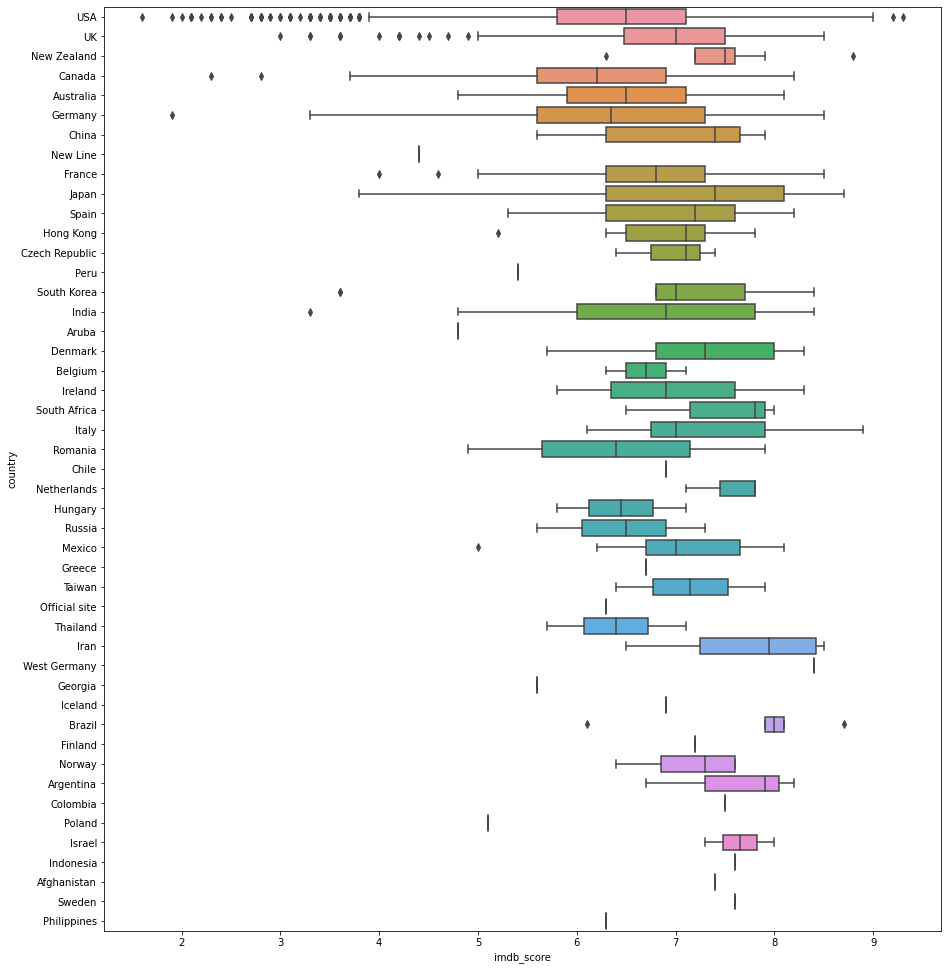

In [24]:
# Boxplot of imdb scores of movies from different countries
plt.figure(figsize=(15,17))
x = df.imdb_score
y = df.country
sns.boxplot(x=x, y=y);

- **Distribution of imdb scores of movies from different countries. The U.S. has many movies that scored poorly but also have the few highest scores as well. This is likely due to the sheer amount of movies produced in the country.**

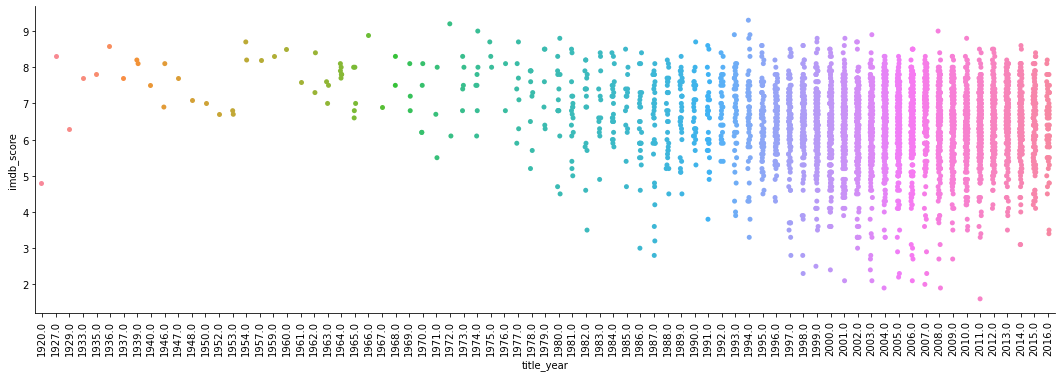

In [25]:
# Using a catplot to visualize the number of movies released each year and their imdb scores
catplot = sns.catplot(data=df, x='title_year', y='imdb_score', height=5, aspect=3);
catplot.set_xticklabels(rotation=90)

- **The number of movies increased as time and technology progressed. User ratings of older movies seem to be higher than newer movies. This is likely due to nostalgia for the older movies as well as the mass production and lower barrier to entry in the recent years leading to a general lower quality of films.**

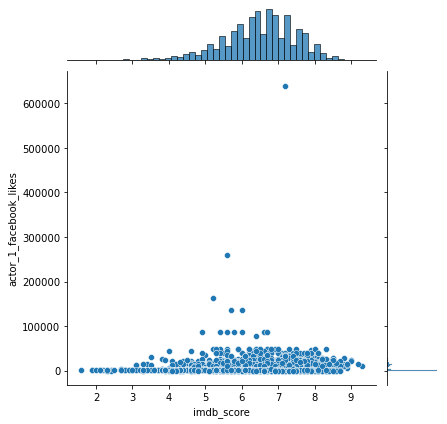

In [26]:
# Plotting the first actor/actress' amount of facebook likes with the imdb scores of their movies
sns.jointplot("imdb_score", "actor_1_facebook_likes", df);

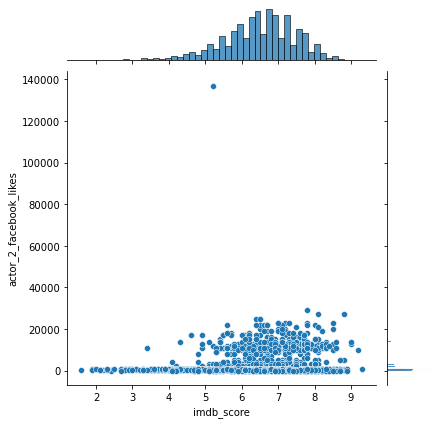

In [27]:
# Plotting the second actor/actress' amount of facebook likes with the imdb scores of their movies
sns.jointplot("imdb_score", "actor_2_facebook_likes", df);

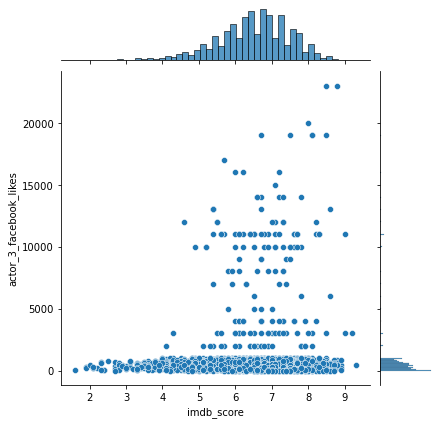

In [28]:
# Same idea with the previous 2 plots, but with the third actor/actress
sns.jointplot("imdb_score", "actor_3_facebook_likes", df);

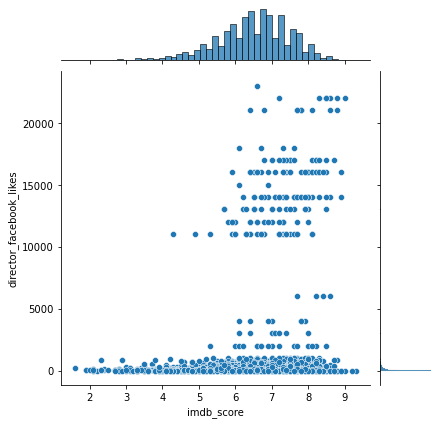

In [29]:
# Plotting the directors likes on facebook and the imdb scores of their movies
sns.jointplot("imdb_score", "director_facebook_likes", df);

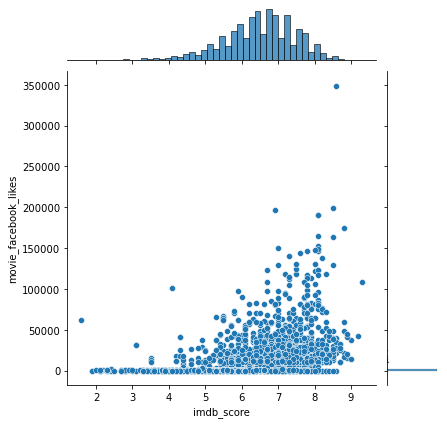

In [30]:
# Plotting the movies likes on facebook and the imdb scores of their movies
sns.jointplot("imdb_score", "movie_facebook_likes", df);

- **These graphs of facebook likes are quite surprising. The actors facebook popularity does not seem to matter as much as either director or movie likes in regard to high imdb scores.**
- **However, it does make logical sense that directors that create a movie that is highly rated will gain a following of people that want to see more from that director.**

## Correlation Analysis

In [31]:
# General Correlation data for the columns
df.corr()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,return_on_investment
num_critic_for_reviews,1.000000,0.179823,0.257616,0.172712,0.475095,0.599193,0.244229,-0.035005,0.572325,0.107213,0.394716,0.259578,0.341718,0.702638,0.040868,0.033238
director_facebook_likes,0.179823,1.000000,0.119345,0.091314,0.142436,0.302308,0.120630,-0.047509,0.220515,0.019192,-0.046129,0.118144,0.189919,0.164163,0.024986,-0.006309
actor_3_facebook_likes,0.257616,0.119345,1.000000,0.253791,0.303630,0.271518,0.490185,0.104443,0.209882,0.041161,0.112662,0.554535,0.064813,0.273985,0.053017,-0.012184
actor_1_facebook_likes,0.172712,0.091314,0.253791,1.000000,0.149015,0.183590,0.945206,0.064455,0.127276,0.017490,0.091583,0.391916,0.092385,0.132830,0.028685,-0.015643
gross,0.475095,0.142436,0.303630,0.149015,1.000000,0.630056,0.240958,-0.031344,0.551331,0.101630,0.046682,0.257134,0.211716,0.371490,0.207976,0.018490
num_voted_users,0.599193,0.302308,0.271518,0.183590,0.630056,1.000000,0.253795,-0.032666,0.781903,0.068235,0.016445,0.249175,0.474211,0.520470,0.126904,0.010552
cast_total_facebook_likes,0.244229,0.120630,0.490185,0.945206,0.240958,0.253795,1.000000,0.086440,0.185000,0.030007,0.120969,0.642874,0.105480,0.208356,0.044688,-0.018644
facenumber_in_poster,-0.035005,-0.047509,0.104443,0.064455,-0.031344,-0.032666,0.086440,1.000000,-0.079363,-0.022103,0.070096,0.072849,-0.066690,0.015484,0.012082,-0.013533
num_user_for_reviews,0.572325,0.220515,0.209882,0.127276,0.551331,0.781903,0.185000,-0.079363,1.000000,0.072860,0.011460,0.192704,0.320646,0.374777,0.098118,0.068706
budget,0.107213,0.019192,0.041161,0.017490,0.101630,0.068235,0.030007,-0.022103,0.072860,1.000000,0.045000,0.036906,0.028918,0.053886,-0.951933,-0.008033


<AxesSubplot:>

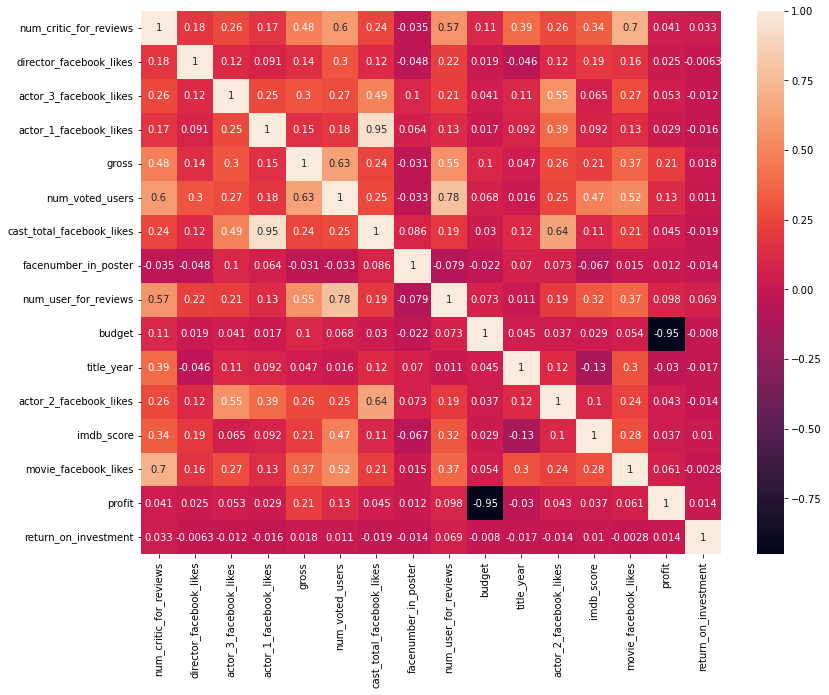

In [32]:
# Visualizing the correlation data to try to gain a better understanding of any correlations
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot=True)

- According to the heatmap, imdb score has its best correlation with number of critical reviews, number of users voted, number of users who gave a review, and movie facebook likes.

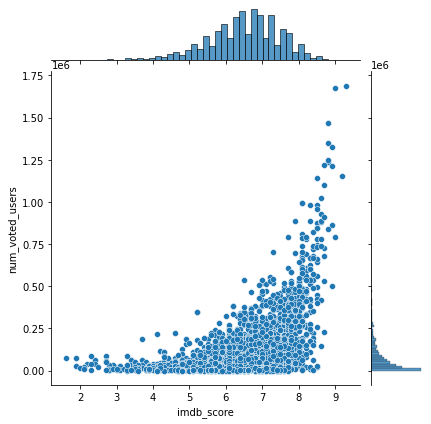

In [33]:
# Plotting the highest correlated columns for imdb score to get better visualization
sns.jointplot("imdb_score", "num_voted_users", df);

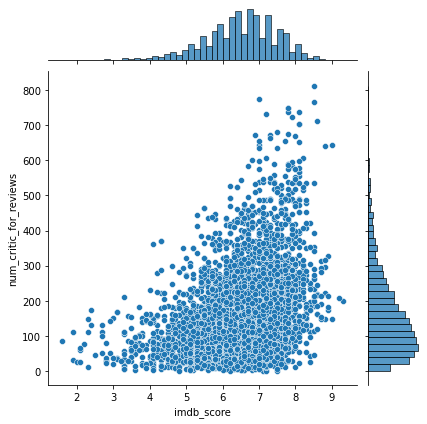

In [34]:
# Plotting the highest correlated columns for imdb score to get better visualization
sns.jointplot("imdb_score", "num_critic_for_reviews", df);

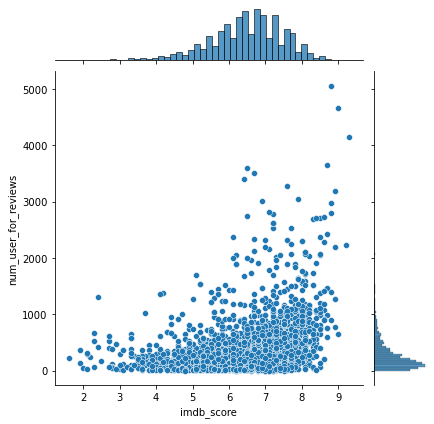

In [35]:
# Plotting the highest correlated columns for imdb score to get better visualization
sns.jointplot("imdb_score", "num_user_for_reviews", df);

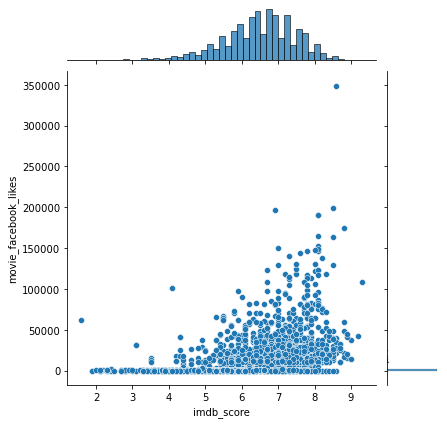

In [36]:
# Plotting the highest correlated columns for imdb score to get better visualization
sns.jointplot("imdb_score", "movie_facebook_likes", df);

- **These plots illustrate the correlations that were given from the heatmap. Most interesting information learned is that older movies all have strong reviews. Likely due to small sample size on the IMDb website and/or nostalgia users have for the older movies.**

## Regression

In [37]:
#regression packages (machine learning)
import sklearn.linear_model as lm

#for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#regression (statistics)
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [38]:
y = df['imdb_score']
X = df['num_voted_users']

model1 = lm.LinearRegression()
model1.fit(X[:,np.newaxis], y)
model1_y = model1.predict(X[:,np.newaxis])

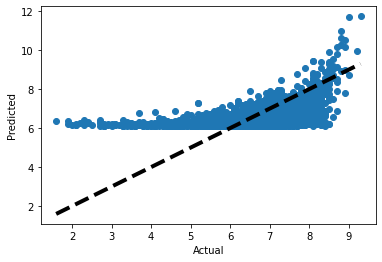

In [39]:
plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [40]:
y = df['imdb_score']
X = df[['num_voted_users','num_critic_for_reviews','num_user_for_reviews']]

model1 = lm.LinearRegression()
model1.fit(X,y)
model1_y = model1.predict(X)

In [41]:
runs_reg_model = ols("imdb_score~num_voted_users",df)
runs_reg = runs_reg_model.fit()
print(runs_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     1123.
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          1.80e-216
Time:                        21:59:23   Log-Likelihood:                -5217.4
No. Observations:                3874   AIC:                         1.044e+04
Df Residuals:                    3872   BIC:                         1.045e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.1204      0.018    3

#### 2nd Regression algorithm

In [42]:
y = df['imdb_score'] 
x = df[['num_critic_for_reviews','director_facebook_likes','actor_1_facebook_likes','num_voted_users','num_user_for_reviews','budget','actor_2_facebook_likes','movie_facebook_likes']]

In [43]:
model2 = linear_model.Lasso(alpha=1)
model2.fit(x, y)
model2_y = model2.predict(x)

In [44]:
print('Coefficients: ', model2.coef_)
print("y-intercept: ", model2.intercept_)

Coefficients:  [ 1.07889566e-03  1.74367349e-05  3.98280707e-07  3.70430678e-06
 -4.05522850e-04 -3.59649794e-11 -7.82990252e-06 -1.39654100e-06]
y-intercept:  6.051334272237438


In [45]:
coef = ["%.3f" % i for i in model2.coef_]
xcolumns = [ i for i in x.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.001'),
 ('director_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('num_voted_users', '0.000'),
 ('num_user_for_reviews', '-0.000'),
 ('budget', '-0.000'),
 ('actor_2_facebook_likes', '-0.000'),
 ('movie_facebook_likes', '-0.000')]

In [46]:
print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.8449229251330621
variance or r-squared:  0.24341263834488958


- According to this model, none of the values are deemed significant to the y-value imdb_score.

#### 3rd Regression algorithm

In [47]:
X_new = SelectKBest(f_regression, k=3).fit_transform(x, y)
X_new

array([[7.23000e+02, 8.86204e+05, 3.05400e+03],
       [3.02000e+02, 4.71220e+05, 1.23800e+03],
       [6.02000e+02, 2.75868e+05, 9.94000e+02],
       ...,
       [5.60000e+01, 5.20550e+04, 1.30000e+02],
       [1.40000e+01, 1.33800e+03, 1.40000e+01],
       [4.30000e+01, 4.28500e+03, 8.40000e+01]])

In [48]:
selector = SelectKBest(f_regression, k=3).fit(x, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[0 3 4]


- num_critic_for_reviews, num_voted_users, and num_user_for_reviews are the x-values chosen.

In [49]:
model3 = lm.LinearRegression()
model3.fit(X_new, y)
model3_y = model3.predict(X_new)

print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))

mean square error:  0.8492272046799794
variance or r-squared:  0.23955836547649134


- I'd like to try k=2 to see if anything substantially changes.

In [50]:
x_new = SelectKBest(f_regression, k=2).fit_transform(x, y)
x_new

array([[7.23000e+02, 8.86204e+05],
       [3.02000e+02, 4.71220e+05],
       [6.02000e+02, 2.75868e+05],
       ...,
       [5.60000e+01, 5.20550e+04],
       [1.40000e+01, 1.33800e+03],
       [4.30000e+01, 4.28500e+03]])

In [51]:
selector = SelectKBest(f_regression, k=2).fit(x, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[0 3]


- num_critic_for_reviews and num_voted_users are the x-values chosen.

In [52]:
model4 = lm.LinearRegression()
model4.fit(x_new, y)
model4_y = model4.predict(x_new)

print("mean square error: ", mean_squared_error(y, model4_y))
print("variance or r-squared: ", explained_variance_score(y, model4_y))

mean square error:  0.8598485045810107
variance or r-squared:  0.2300475082959933


- k=2 gives a slightly lower r-squared.

## Classification

In [53]:
df['score_classification'] = 0
df.loc[(df['imdb_score'] > 0) & (df['imdb_score'] <= 5), 'score_classification'] = 0
df.loc[(df['imdb_score'] > 5) & (df['imdb_score'] <= 10), 'score_classification'] = 1
df.head()

,director_name,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,...,num_user_for_reviews,country,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,return_on_investment,score_classification
0,James Cameron,723.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,...,3054.0,USA,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543,1
1,Gore Verbinski,302.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,...,1238.0,USA,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717,1
2,Sam Mendes,602.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,...,994.0,UK,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,-18.337071,1
3,Christopher Nolan,813.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,...,2701.0,USA,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,79.252257,1
5,Andrew Stanton,462.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,...,738.0,USA,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,-72.294775,1


In [54]:
df.groupby('imdb_score')['score_classification'].min().sort_values(ascending=True).head()

imdb_score
1.6    0
5.0    0
4.9    0
4.8    0
4.7    0
Name: score_classification, dtype: int64

In [55]:
df.groupby('imdb_score')['score_classification'].max().sort_values(ascending=False).head()

imdb_score
5.6    1
5.7    1
7.3    1
7.2    1
7.1    1
Name: score_classification, dtype: int64

- **Appears to have successfully categorized scores as good or bad based on 1-5 being "bad" and 6-10 being "good".**

In [56]:
df1 = df
y = df1['score_classification']
X = df1.drop(['director_name','actor_1_name','actor_2_name','movie_title','country','actor_3_name','score_classification','imdb_score'], axis=1)

In [57]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.8761822871883062
--------------------------------------------------------
[[ 29  78]
 [ 66 990]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.31      0.27      0.29       107
           1       0.93      0.94      0.93      1056

    accuracy                           0.88      1163
   macro avg       0.62      0.60      0.61      1163
weighted avg       0.87      0.88      0.87      1163

--------------------------------------------------------
0.6042640186915889


- model is 86% accurate.

### Random Forest Algorithm

In [59]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9122957867583835

In [60]:
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.9122957867583835
[[   8   99]
 [   3 1053]]
              precision    recall  f1-score   support

           0       0.73      0.07      0.14       107
           1       0.91      1.00      0.95      1056

    accuracy                           0.91      1163
   macro avg       0.82      0.54      0.54      1163
weighted avg       0.90      0.91      0.88      1163



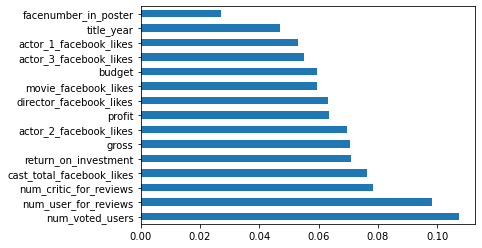

In [61]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

In [62]:
clf.predict_proba(X_test)
# 1st value: the probability of a bad rating (0)
# 2nd value: the probability of a good rating(1)

array([[0.05, 0.95],
       [0.15, 0.85],
       [0.  , 1.  ],
       ...,
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ]])

- **Random Forest showed that the model is 91.6% accurate and the number of voted users and number of users who left a review are the most important predictors.**

### Logistics Regression Algorithm

In [63]:
corr = pd.DataFrame(df1.corr()['score_classification'].drop(['score_classification','imdb_score']))
corr.sort_values(['score_classification'], ascending = False)

,score_classification
num_critic_for_reviews,0.169385
num_voted_users,0.156156
gross,0.097942
movie_facebook_likes,0.097401
num_user_for_reviews,0.091178
cast_total_facebook_likes,0.085955
actor_1_facebook_likes,0.079483
actor_2_facebook_likes,0.075519
director_facebook_likes,0.065582
actor_3_facebook_likes,0.041246


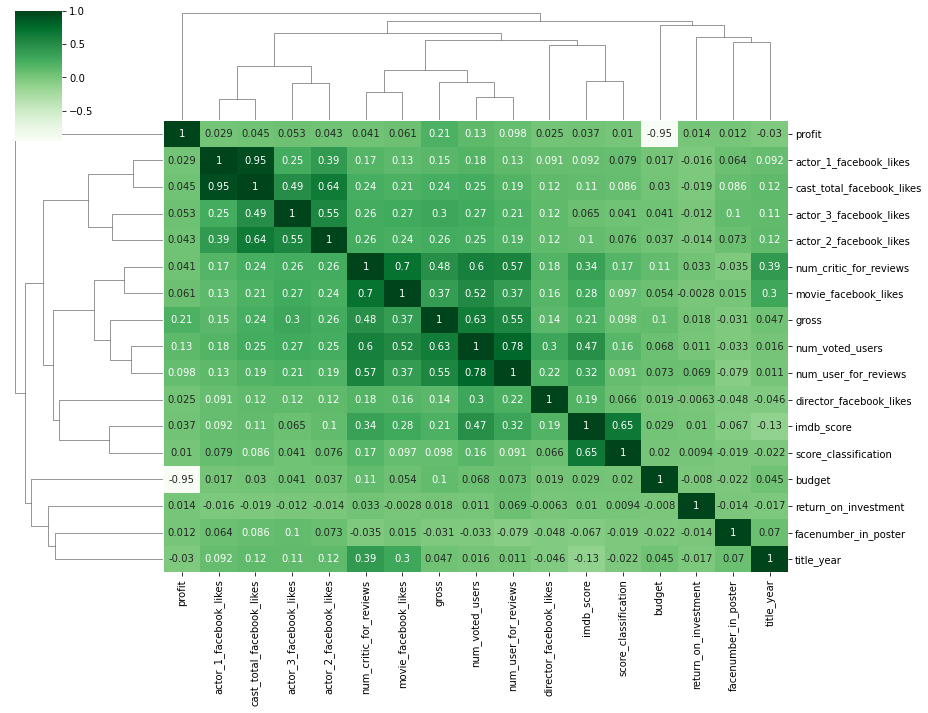

In [64]:
sns.clustermap(data=df1.corr(), annot=True, cmap='Greens', figsize=(13,10));

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [66]:
coef = pd.DataFrame(list(zip(X.columns, np.transpose(lr.coef_))), 
             columns=['X variables', 'coef']).sort_values('coef', ascending=False)

coef['coef'] = coef['coef'].str[0]
coef

,X variables,coef
10,title_year,6.201558e-04
1,director_facebook_likes,1.395932e-04
14,return_on_investment,1.242929e-04
6,cast_total_facebook_likes,3.102695e-05
5,num_voted_users,2.634579e-05
2,actor_3_facebook_likes,2.542225e-05
0,num_critic_for_reviews,1.655787e-05
11,actor_2_facebook_likes,1.391976e-05
7,facenumber_in_poster,4.376882e-07
9,budget,-3.010585e-09


In [67]:
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.9079965606190885
[[   0  107]
 [   0 1056]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.91      1.00      0.95      1056

    accuracy                           0.91      1163
   macro avg       0.45      0.50      0.48      1163
weighted avg       0.82      0.91      0.86      1163

0.5


In [68]:
probs = lr.predict_proba(X_test)
print(probs)
#1st column: probability of a score 5 or below
#2nd column: probabiility of a score 6 or higher

[[4.06456155e-02 9.59354384e-01]
 [1.99973783e-01 8.00026217e-01]
 [2.63556348e-04 9.99736444e-01]
 ...
 [2.11999673e-04 9.99788000e-01]
 [4.47793223e-02 9.55220678e-01]
 [6.61278577e-02 9.33872142e-01]]


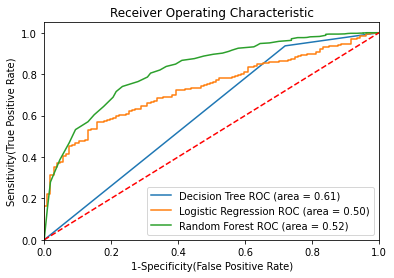

In [69]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver='lbfgs', max_iter=500),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=100),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    #y_pred=model.predict(X_test) # predict the test data
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

- **Overall the classification models demonstrate that the values we found were strong predictors earlier in our analysis are still true when we split up the imdb scores into low and high ratings.**
- **num_voted_users, num_user_for_reviews and num_critic_for_reviews are the values most correlated with the imdb scores, even when we use classification to split the scores into low and high ratings.**

## Clustering

In [70]:
df2 = df1[['num_voted_users','num_user_for_reviews','num_critic_for_reviews']]
df2.head()

,num_voted_users,num_user_for_reviews,num_critic_for_reviews
0,886204,3054.0,723.0
1,471220,1238.0,302.0
2,275868,994.0,602.0
3,1144337,2701.0,813.0
5,212204,738.0,462.0


In [71]:
df2_norm = (df2 - df2.mean()) / (df2.max() - df2.min())
df2_norm.head()

,num_voted_users,num_user_for_reviews,num_critic_for_reviews
0,0.463636,0.538870,0.689241
1,0.218048,0.179905,0.170768
2,0.102438,0.131674,0.540226
3,0.616399,0.469093,0.800079
5,0.064762,0.081072,0.367813


In [72]:
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)

In [73]:
k_means.fit(df2_norm)

KMeans(n_clusters=3, random_state=0)

In [74]:
df3 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df3.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [75]:
df4 = df2_norm.join(df3)
df4.head()

,num_voted_users,num_user_for_reviews,num_critic_for_reviews,cluster
0,0.463636,0.538870,0.689241,0.0
1,0.218048,0.179905,0.170768,0.0
2,0.102438,0.131674,0.540226,0.0
3,0.616399,0.469093,0.800079,0.0
5,0.064762,0.081072,0.367813,0.0


### Profiling the clusters

In [76]:
df4.groupby('cluster').mean()

,num_voted_users,num_user_for_reviews,num_critic_for_reviews
cluster,,,
0.0,0.053706,0.050614,0.106330
1.0,-0.005272,-0.005599,-0.009248
2.0,0.010842,0.008246,0.015242


**It looks like number of critic reviews is an important factor in clustering analysis, at least compared to the other factors.**

- Cluster 1: medium number of user votes, medium number of user reviews, medium number of critic reviews
- Cluster 2: low number of user votes, low number of user reviews, low number of critic reviews
- Cluster 3: high number of user votes, high number of user reviews, high number of critic reviews

In [77]:
df4.groupby('cluster').size()

cluster
0.0     318
1.0    1856
2.0    1132
dtype: int64

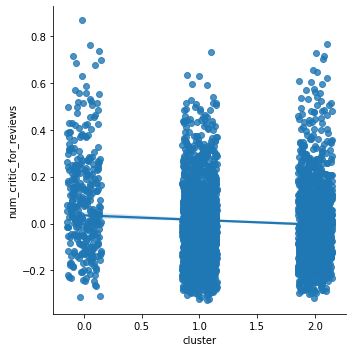

In [78]:
sns.lmplot("cluster", "num_critic_for_reviews", df4, x_jitter=.15, y_jitter=.15)

## Storytelling

- As I started diving into the data, I learned many things in regards to movie success and what does and does not affect the imdb score. 
- The average of the imdb scores from the dataset was 6.5. So, the average movie was rated a 6.5 by imdb users.
- The very large majority of movies were produced in the United States, unsurprisingly.

In [79]:
df['country'].value_counts().sort_values(ascending=False).head()

USA        3062
UK          324
France      105
Germany      82
Canada       63
Name: country, dtype: int64

- Early on in my analysis I noticed that the more people that vote on a movie on IMDb, the more likely the IMDb score will be high.

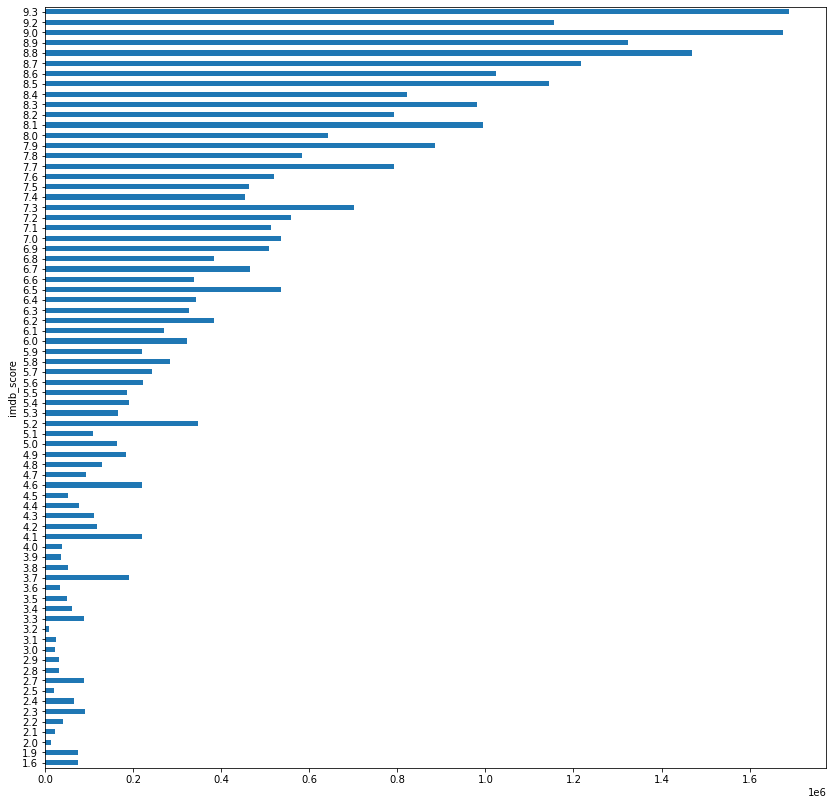

In [80]:
# Recalling the graph that stood out to me most.
# General trend of more people voting on the movie the more likely people enjoyed the movie and rated it highly.
df.groupby('imdb_score')['num_voted_users'].max().plot(kind='barh', figsize=(14,14));

When I looked at correlation analysis, it helped me better and more easily understand what values are impacting the IMDb scores. 
-	I found that the number of critical reviews, number users votes, and number of users who gave a review were the highest correlations to the IMDb scores.


- The further analysis done continues to expound upon the initial revelation in the correlation analysis. I used regression modeling, classification analysis, and clustering analysis to really test the data to make sure I selected the correct values that affect IMDb score.

#### Recommendations

- My recommendation for movie producers is to advertise quickly and broadly in order to drive hype and excitement for the film(s). As I've realized with this analysis, the more people that vote on a movie on IMDb, the more likely the movie will have a higher IMDb score and thus higher success. One of the reasons, I believe, that more users vote on movies is because of hype, excitement and enjoyment of the films. If producers will take those into account, then they will see higher IMDb scores on their films.
- My recommendation for investors is to gauge excitement of viewers based on social media activity and critic reviews. Critic reviews seem to correlate with the IMDb scores as well. Following the trend of critical reviews of films will help investors navigate which production companies might be on the rise and which companies might be falling.
- My recommendation for viewers is to continue voting on films they watch. This data shows they have a real impact on the future of film entertainment. The voice of the viewers dictate what new films that production companies will work on in the future. This is a similar acclaim of "voting with your dollar," you are voting with your opinion and, according to this data, it matters.

#### Additional Variables

- In order to improve the model prediction, I would have liked to have some additional variables that related to viewer excitement over the movies. The ideal way I could think of gathering this data would be to parse through social media posts that mention the movies, characters the actors play in the movies and other similar data. I believe viewer data like this gives very valuable insight as to why they enjoy these top rated films and could lead to conclusions on exactly how to replicate or improve the success of past films.